In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')  
stock_data = yf.download('AAPL', start='2025-01-01')  
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.263199,248.500565,241.238085,248.330961,55740700
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000
2025-01-08,242.115952,243.123531,239.472335,241.337830,37628900
2025-01-10,236.280045,239.582077,232.439303,239.432429,61710900
2025-01-13,233.835922,234.105277,229.167192,232.968021,49630700
2025-01-14,232.718613,235.551775,231.910564,234.185076,39435300


In [2]:
# Reindex to include all calendar days
stock_data = stock_data.asfreq('D') 

In [3]:
# Optionally fill missing values
stock_data = stock_data.fillna(method='ffill')  # Forward-fill missing data

In [4]:
stock_data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-20,211.179993,211.789993,209.699997,210.869995,48974600.0
2025-07-21,212.479996,215.779999,211.630005,212.100006,51377400.0
2025-07-22,214.399994,214.949997,212.229996,213.139999,46404100.0
2025-07-23,214.149994,215.149994,212.410004,215.000000,46989300.0
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600.0
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800.0
2025-07-26,213.880005,215.240005,213.399994,214.699997,40268800.0
2025-07-27,213.880005,215.240005,213.399994,214.699997,40268800.0


In [5]:
stock_data= stock_data[['Close']]
stock_data

Price,Close
Ticker,AAPL
Date,
2025-01-02,243.263199
2025-01-03,242.774368
2025-01-04,242.774368
2025-01-05,242.774368
2025-01-06,244.410416
...,...
2025-07-25,213.880005
2025-07-26,213.880005


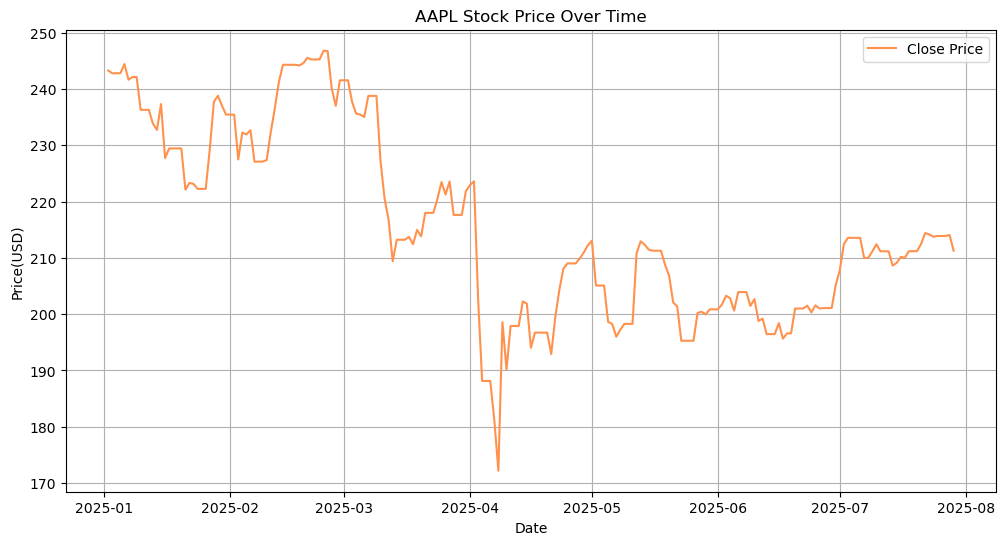

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price',color='#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=30)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid




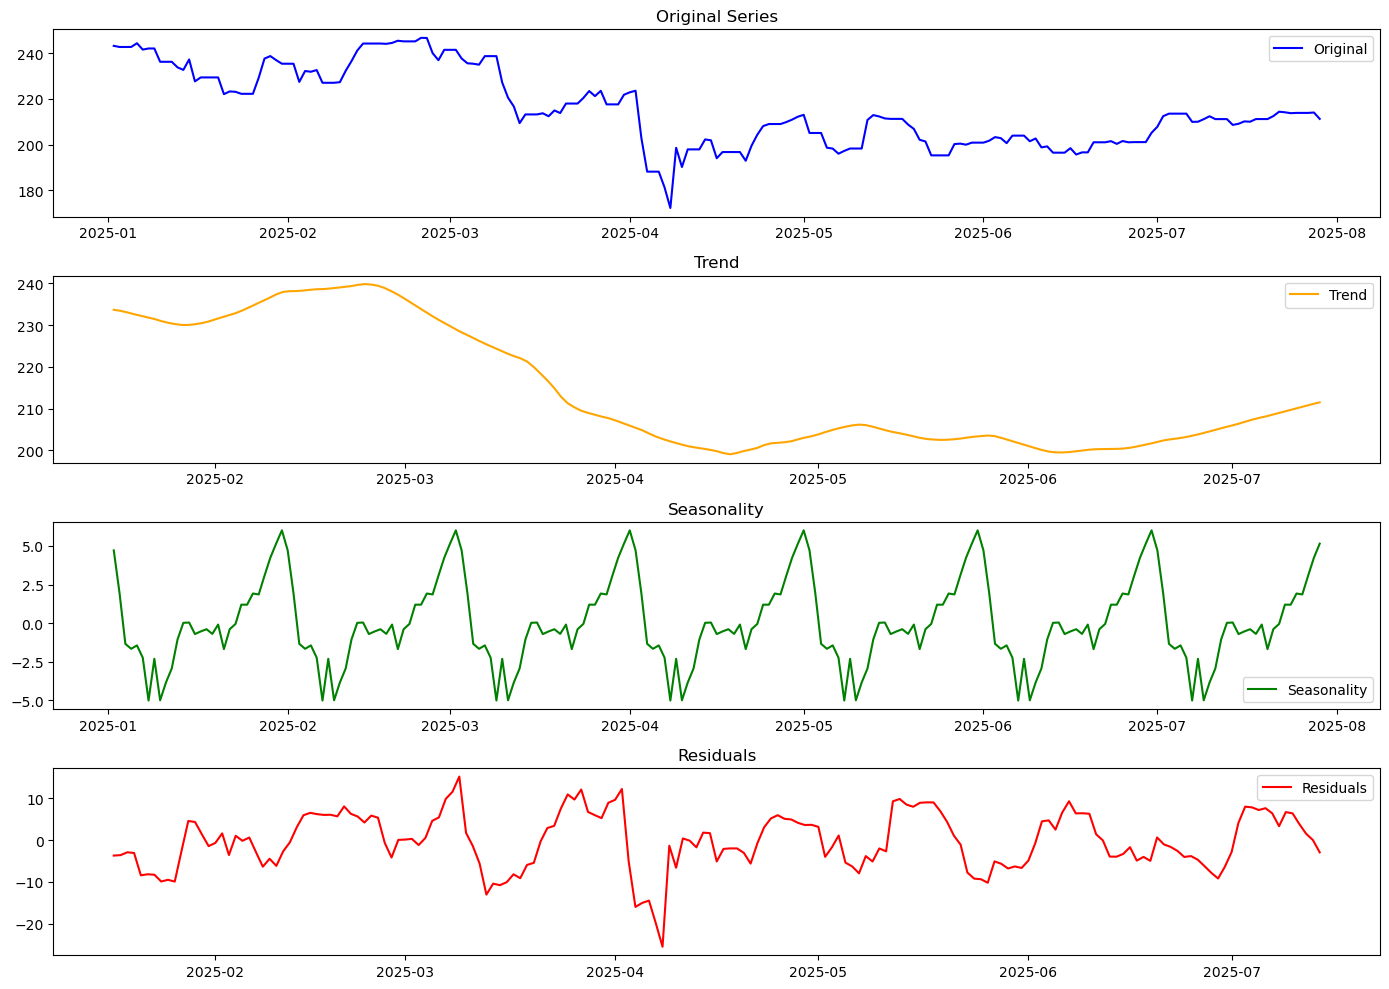

In [8]:
# Plot all components
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.title('Original Series')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

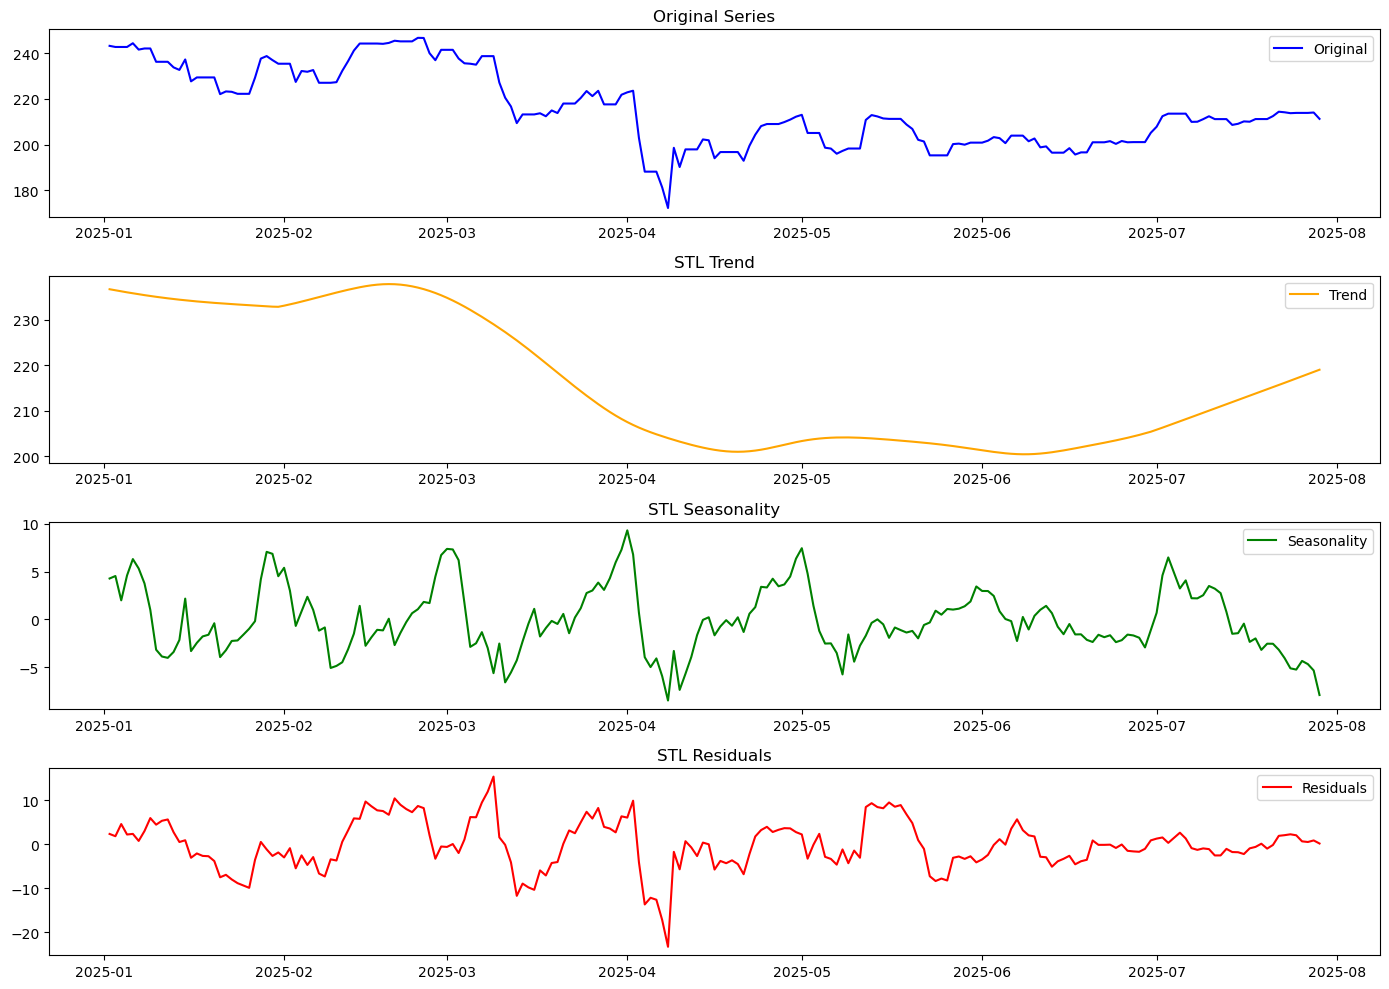

In [9]:
from statsmodels.tsa.seasonal import STL

# STL decomposition (period=30 assumes monthly seasonality for daily data)
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot all components
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.title('Original Series')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('STL Trend')
plt.legend()

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('STL Seasonality')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.title('STL Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(stock_data['Close'].dropna())  # dropna is important

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:") 
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if result[1] < 0.05:
    print("✅ The series is stationary (reject H0)")
else:
    print("❌ The series is non-stationary (fail to reject H0)")


ADF Statistic: -2.154983572242222
p-value: 0.22298737804418461
Critical Values:
   1%: -3.4621857592784546
   5%: -2.875537986778846
   10%: -2.574231080806213
❌ The series is non-stationary (fail to reject H0)


In [11]:
def adf_test(series):
    result=adfuller(series)
    print('ADf Statistic:',result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value(%s): %.3f' % (key, value))



In [12]:
prices = stock_data['Close']

In [13]:
adf_test(prices)

ADf Statistic: -2.154983572242222
p-value: 0.22298737804418461
Critical Value(1%): -3.462
Critical Value(5%): -2.876
Critical Value(10%): -2.574


In [14]:
prices

Ticker,AAPL
Date,
2025-01-02,243.263199
2025-01-03,242.774368
2025-01-04,242.774368
2025-01-05,242.774368
2025-01-06,244.410416
...,...
2025-07-25,213.880005
2025-07-26,213.880005
2025-07-27,213.880005


In [15]:
#prices.diff().dropna()


In [16]:
##adf_test(prices.diff().dropna())


In [17]:
 ##9.253517446728197e-27<0.05

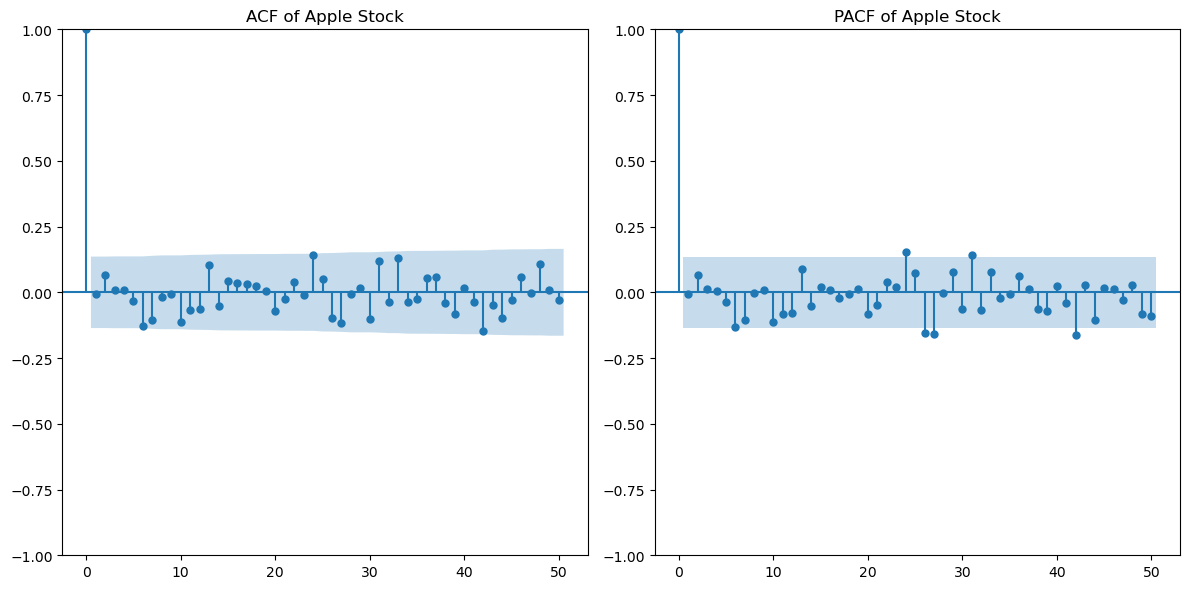

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().dropna(),ax=plt.gca(),lags=50)
plt.title('ACF of Apple Stock')

#PACF plot
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().dropna(),ax=plt.gca(),lags=50,method='ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

In [19]:
!pip install pmdarima


In [20]:
import pmdarima as pm

model = pm.auto_arima(
    stock_data['Close'],    
    seasonal=False,         
    stepwise=True,
    suppress_warnings=True,
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1175.427, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1172.363, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.354, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1174.355, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1170.669, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1176.140, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.605 seconds


## **AR MODEL (AUTO REGRESSIVE)**

In [21]:
stock_data =yf.download('AAPL',start='2025-01-01')
apple_price_stationary=stock_data['Close'].diff().dropna()

train_data,test_data = apple_price_stationary[:-30],apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


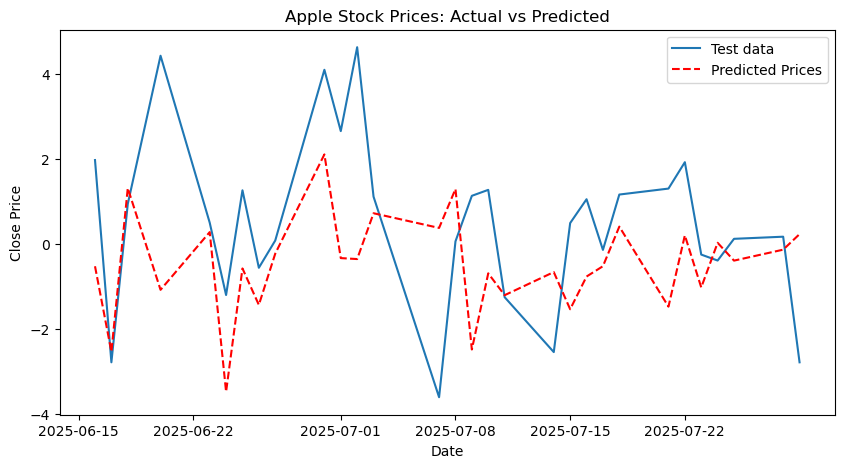

RMSE: 2.2


In [22]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the AR model to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse:.1f}')

## **MA MODEL(MOVING AVERAGE MODEL)**

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\a

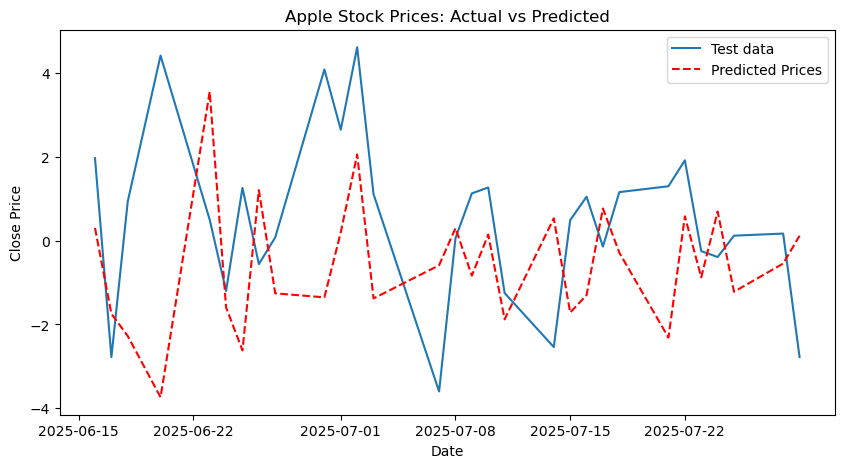

RMSE: 2.7


In [34]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse:.1f}')

## **ARMA MODEL(AUTO REGRESSIVE MOVING AVERAGE MODEL)**

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\a

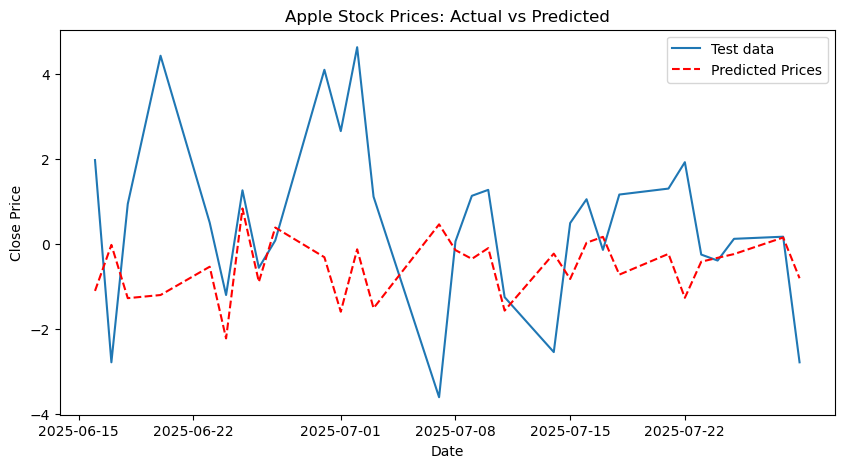

RMSE: 2.4


In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(5, 0, 7 ))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse:.1f}')

## **ARIMA MODEL**

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\a

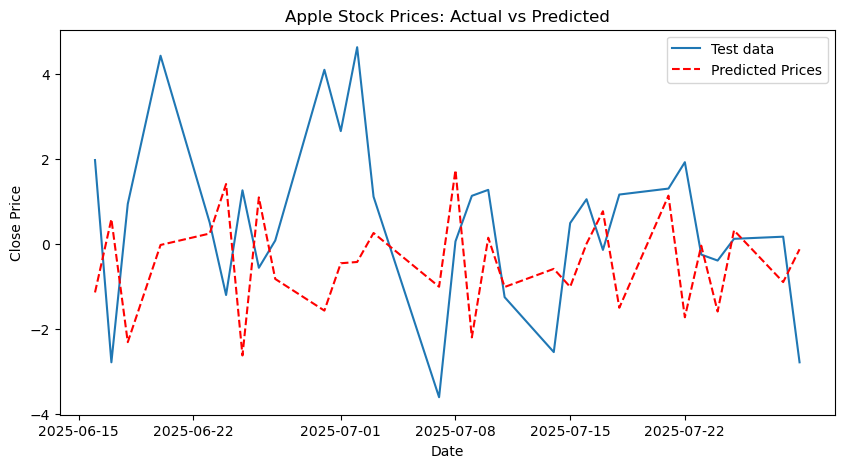

RMSE: 2.6


In [31]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(8,1,9))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse:.1f}')

In [37]:
!pip install tensorflow



[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
✅ RMSE: 3.37


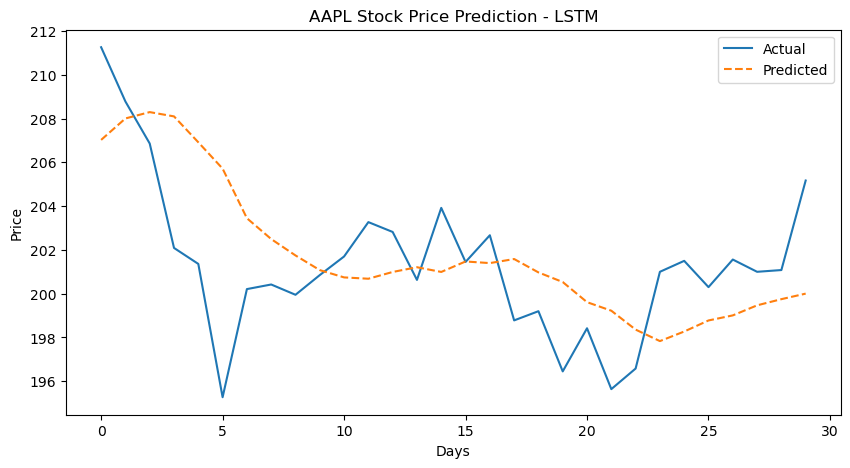

In [43]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load data
df = yf.download('AAPL', start='2023-01-01', end='2025-07-01')
data = df[['Close']].dropna()

# 2. Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Create sequences (60 days to predict next day)
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 60
X, y = create_sequences(scaled_data, lookback)

# 4. Train/test split (last 30 days as test)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# 5. LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Inverse scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# 8. RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'✅ RMSE: {rmse:.2f}')

# 9. Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', linestyle='--')
plt.title('AAPL Stock Price Prediction - LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
